In [1]:
import pandas as pd

df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)



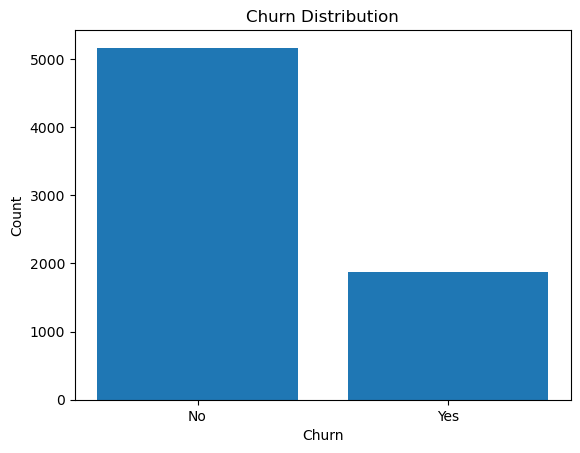

In [4]:
import matplotlib.pyplot as plt
churn_counts = df['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1d003752590>,
 'caps': [<matplotlib.lines.Line2D at 0x1d00734ef90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d00734d190>,
 'medians': [<matplotlib.lines.Line2D at 0x1d007329490>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d0012357d0>,
 'means': []}

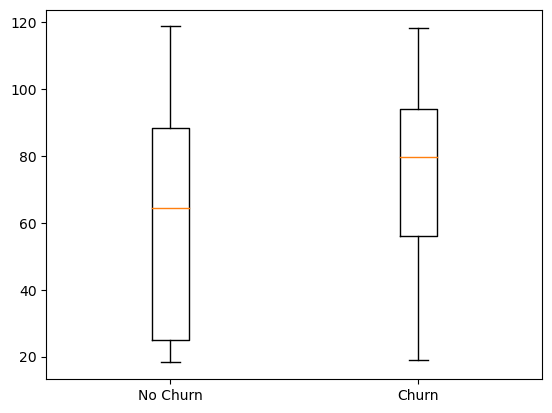

In [10]:
plt.boxplot([df[df['Churn'] == 'No']['MonthlyCharges'], df[df['Churn'] == 'Yes']['MonthlyCharges']],
            labels=['No Churn', 'Churn'])



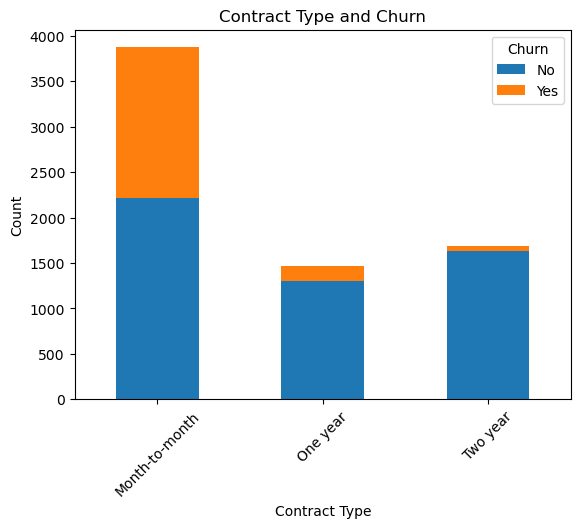

In [6]:
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack().fillna(0)

contract_churn_counts.plot(kind='bar', stacked=True)
plt.title('Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


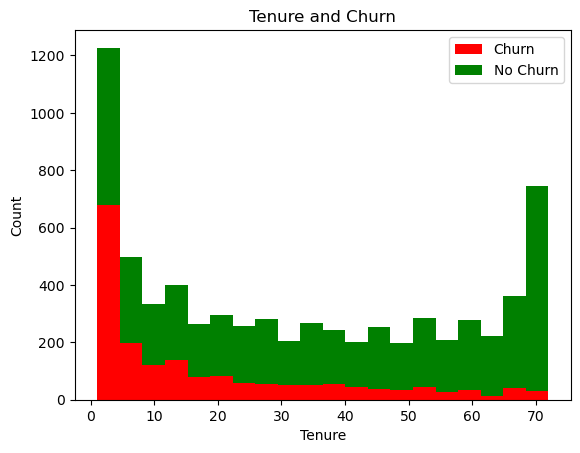

In [12]:
churned = df[df['Churn'] == 'Yes']['tenure']
non_churned = df[df['Churn'] == 'No']['tenure']

plt.hist([churned, non_churned], bins=20, stacked=True, 
         label=['Churn', 'No Churn'], color=['red', 'green'])
plt.title('Tenure and Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend()
plt.show()




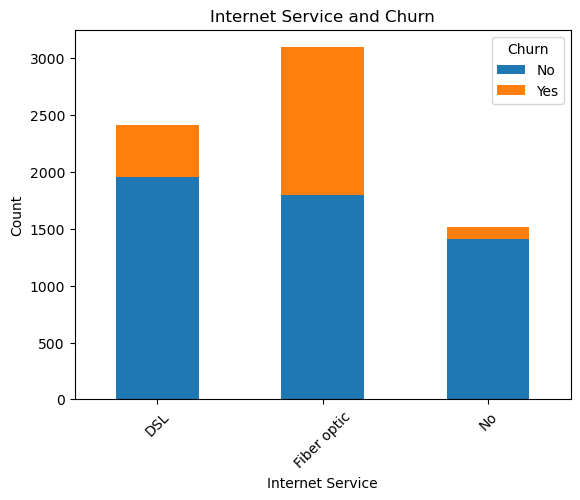

In [8]:
internet_service_churn_counts = df.groupby(['InternetService', 'Churn']).size().unstack().fillna(0)

internet_service_churn_counts.plot(kind='bar', stacked=True)
plt.title('Internet Service and Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


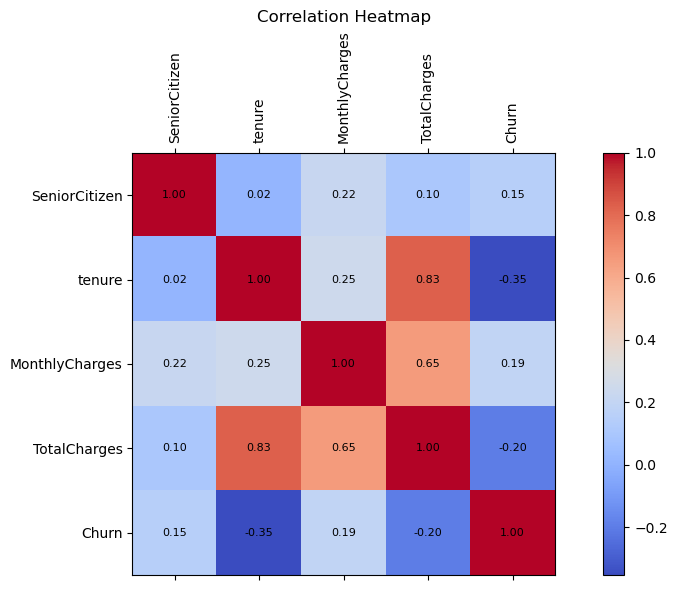

In [15]:
import numpy as np
import matplotlib.pyplot as plt

df_encoded = df.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Keep only numeric columns
df_numeric = df_encoded.select_dtypes(include=[np.number])

# Compute correlation
corr_matrix = df_numeric.corr()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(corr_matrix, cmap="coolwarm")
fig.colorbar(cax)

# Set axis ticks
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Annotate each cell with the numeric correlation value
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=8)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical variables
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode remaining categorical features
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')  # optional: to suppress convergence warnings

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "L1 Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Use scaled or unscaled data depending on model
    if name in ['Naive Bayes', 'Random Forest', 'Decision Tree']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Optional: print sorted summary
print("\n=== Summary of Model Accuracies ===")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {acc:.4f}")



=== Logistic Regression ===
Accuracy: 0.7875
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


=== Ridge Classifier ===
Accuracy: 0.7910
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


=== L1 Logistic Regression ===
Accuracy: 0.7882
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79 

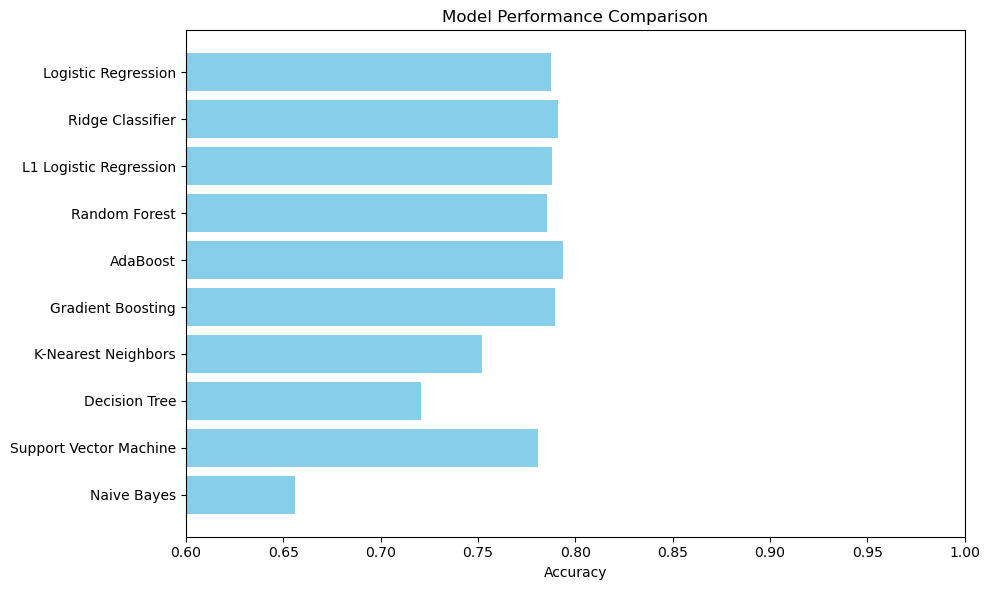

In [21]:
import matplotlib.pyplot as plt

# Sample 'results' dictionary
# results = {'Logistic Regression': 0.82, 'Random Forest': 0.85, ...}

# Data for plotting
models = list(results.keys())
accuracies = list(results.values())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.xlim(0.6, 1.0)
plt.gca().invert_yaxis()  # Optional: to match Seaborn's order
plt.tight_layout()
plt.show()

